In [45]:
class SemanticNetsAgent:
    def __init__(self):
        # Define possible moves: at least 1 and at most 2 animals at a time.
        self.MOVE_LIST = [(0, 1), (0, 2), (1, 0), (1, 1), (2, 0)] 

    def solve(self, initial_sheep, initial_wolves):
        # Initialize the starting state.
        self.initial_sheep = initial_sheep
        self.initial_wolves = initial_wolves
        self.direction = -1 # Direction of the next move: -1 (from left to right) and 1 (from right to left).
        
        # Track historical states to avoid repetition.
        self.history_state_list = [(initial_sheep, initial_wolves, self.direction)]
        
        # Start with the initial path.
        path_list = [[(initial_sheep, initial_wolves, self.direction)]]

        # Explore all possible paths until a solution is found or all paths are exhausted.
        while len(path_list):
            new_path_list = []
            for path in path_list: 
                new_path_list += self.generator(path)

            for path in new_path_list:
                if path[-1][0] == path[-1][1] == 0:
                    return self.get_ans(path)

            path_list = new_path_list
        
        # Return an empty list if the problem isn't solvable.
        return []

    def get_ans(self, path):
        # Convert the path states into corresponding moves.
        state_list_prev = path[:-1]
        state_list_next = path[1:]
        return [(abs(a - x), abs(b - y)) for (a, b, _), (x, y, _) in zip(state_list_prev, state_list_next)]

    def generator(self, path):
        # Generate possible subsequent paths based on the current path.
        current_state = path[-1]
        next_state_list = self.generate_next_state(current_state)
        return [path + [next_state] for next_state in next_state_list]

    def generate_next_state(self, current_state):
        # Calculate potential next states based on the current state.
        left_sheep, left_wolf, move_dir = current_state
        
        # Update possible moves based on the current direction.
        move_list = [tuple(delta * move_dir for delta in move) for move in self.MOVE_LIST]
        next_dir = -1 * move_dir

        next_state_list = []
        for move in move_list:
            next_left_sheep = left_sheep + move[0]
            next_left_wolf  = left_wolf + move[1]
            new_state = (next_left_sheep, next_left_wolf, next_dir)
            
            # Validate and keep track of states.
            if self.state_tester(new_state): 
                next_state_list.append(new_state)
                self.history_state_list.append(new_state)

        return next_state_list

    def state_tester(self, new_state):
        # Validate the potential state.
        left_sheep, left_wolf, move_dir = new_state
        right_sheep, right_wolf = self.initial_sheep - left_sheep, self.initial_wolves - left_wolf

        # Condition 1: Check if the state has been reached before.
        state_reached = new_state in self.history_state_list
        
        # Condition 2: Validate if the number of sheep or wolves on either side is negative, indicating an invalid state.
        state_invalid = left_sheep < 0 or left_wolf < 0 or right_sheep < 0 or right_wolf < 0
        
        # Condition 3: Ensure sheep are not outnumbered by wolves on either side, as they would get eaten.
        sheep_outnumbered = left_wolf > left_sheep > 0 or right_wolf > right_sheep > 0
        
        # Condition 4: Prevent sending a single animal to the right bank when it's empty. 
        empty_bank = right_sheep + right_wolf == 1 and move_dir == 1 

        # If any of the above conditions are met, the state is invalid and should be disregarded.
        if any([state_reached, state_invalid, sheep_outnumbered, empty_bank]): 
            return False

        return True


In [47]:
print(test_agent.solve(10, 3))

[(0, 2), (0, 1), (0, 2), (0, 1), (2, 0), (0, 1), (1, 1), (0, 1), (0, 2), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1)]


In [50]:
from tqdm import tqdm 
import random
import time

In [111]:
test_agent = SemanticNetsAgent()


In [51]:
def runtime_test(n_test, total):

    duration = 0
    for _ in range(n_test):
        n_sheep = random.randint(0, total)
        n_wolf = total - n_sheep
        start_time = time.time()
        test_agent.solve(n_sheep, n_wolf)
        end_time = time.time() 
        duration += end_time - start_time

    return duration/n_test

In [120]:
runtime_list = []
total_list = [a for a in range(0, 201)]
for total in tqdm(total_list):
    runtime_list.append(runtime_test(int(total/5)+1, total))

100%|██████████| 201/201 [25:07<00:00,  7.50s/it]


In [122]:
import pandas as pd

In [121]:
df_compare_0 = df_compare

In [137]:
df_compare = pd.DataFrame([])
df_compare['total'] = total_list[:len(smoothed_data)]
df_compare['runtime'] = smoothed_data

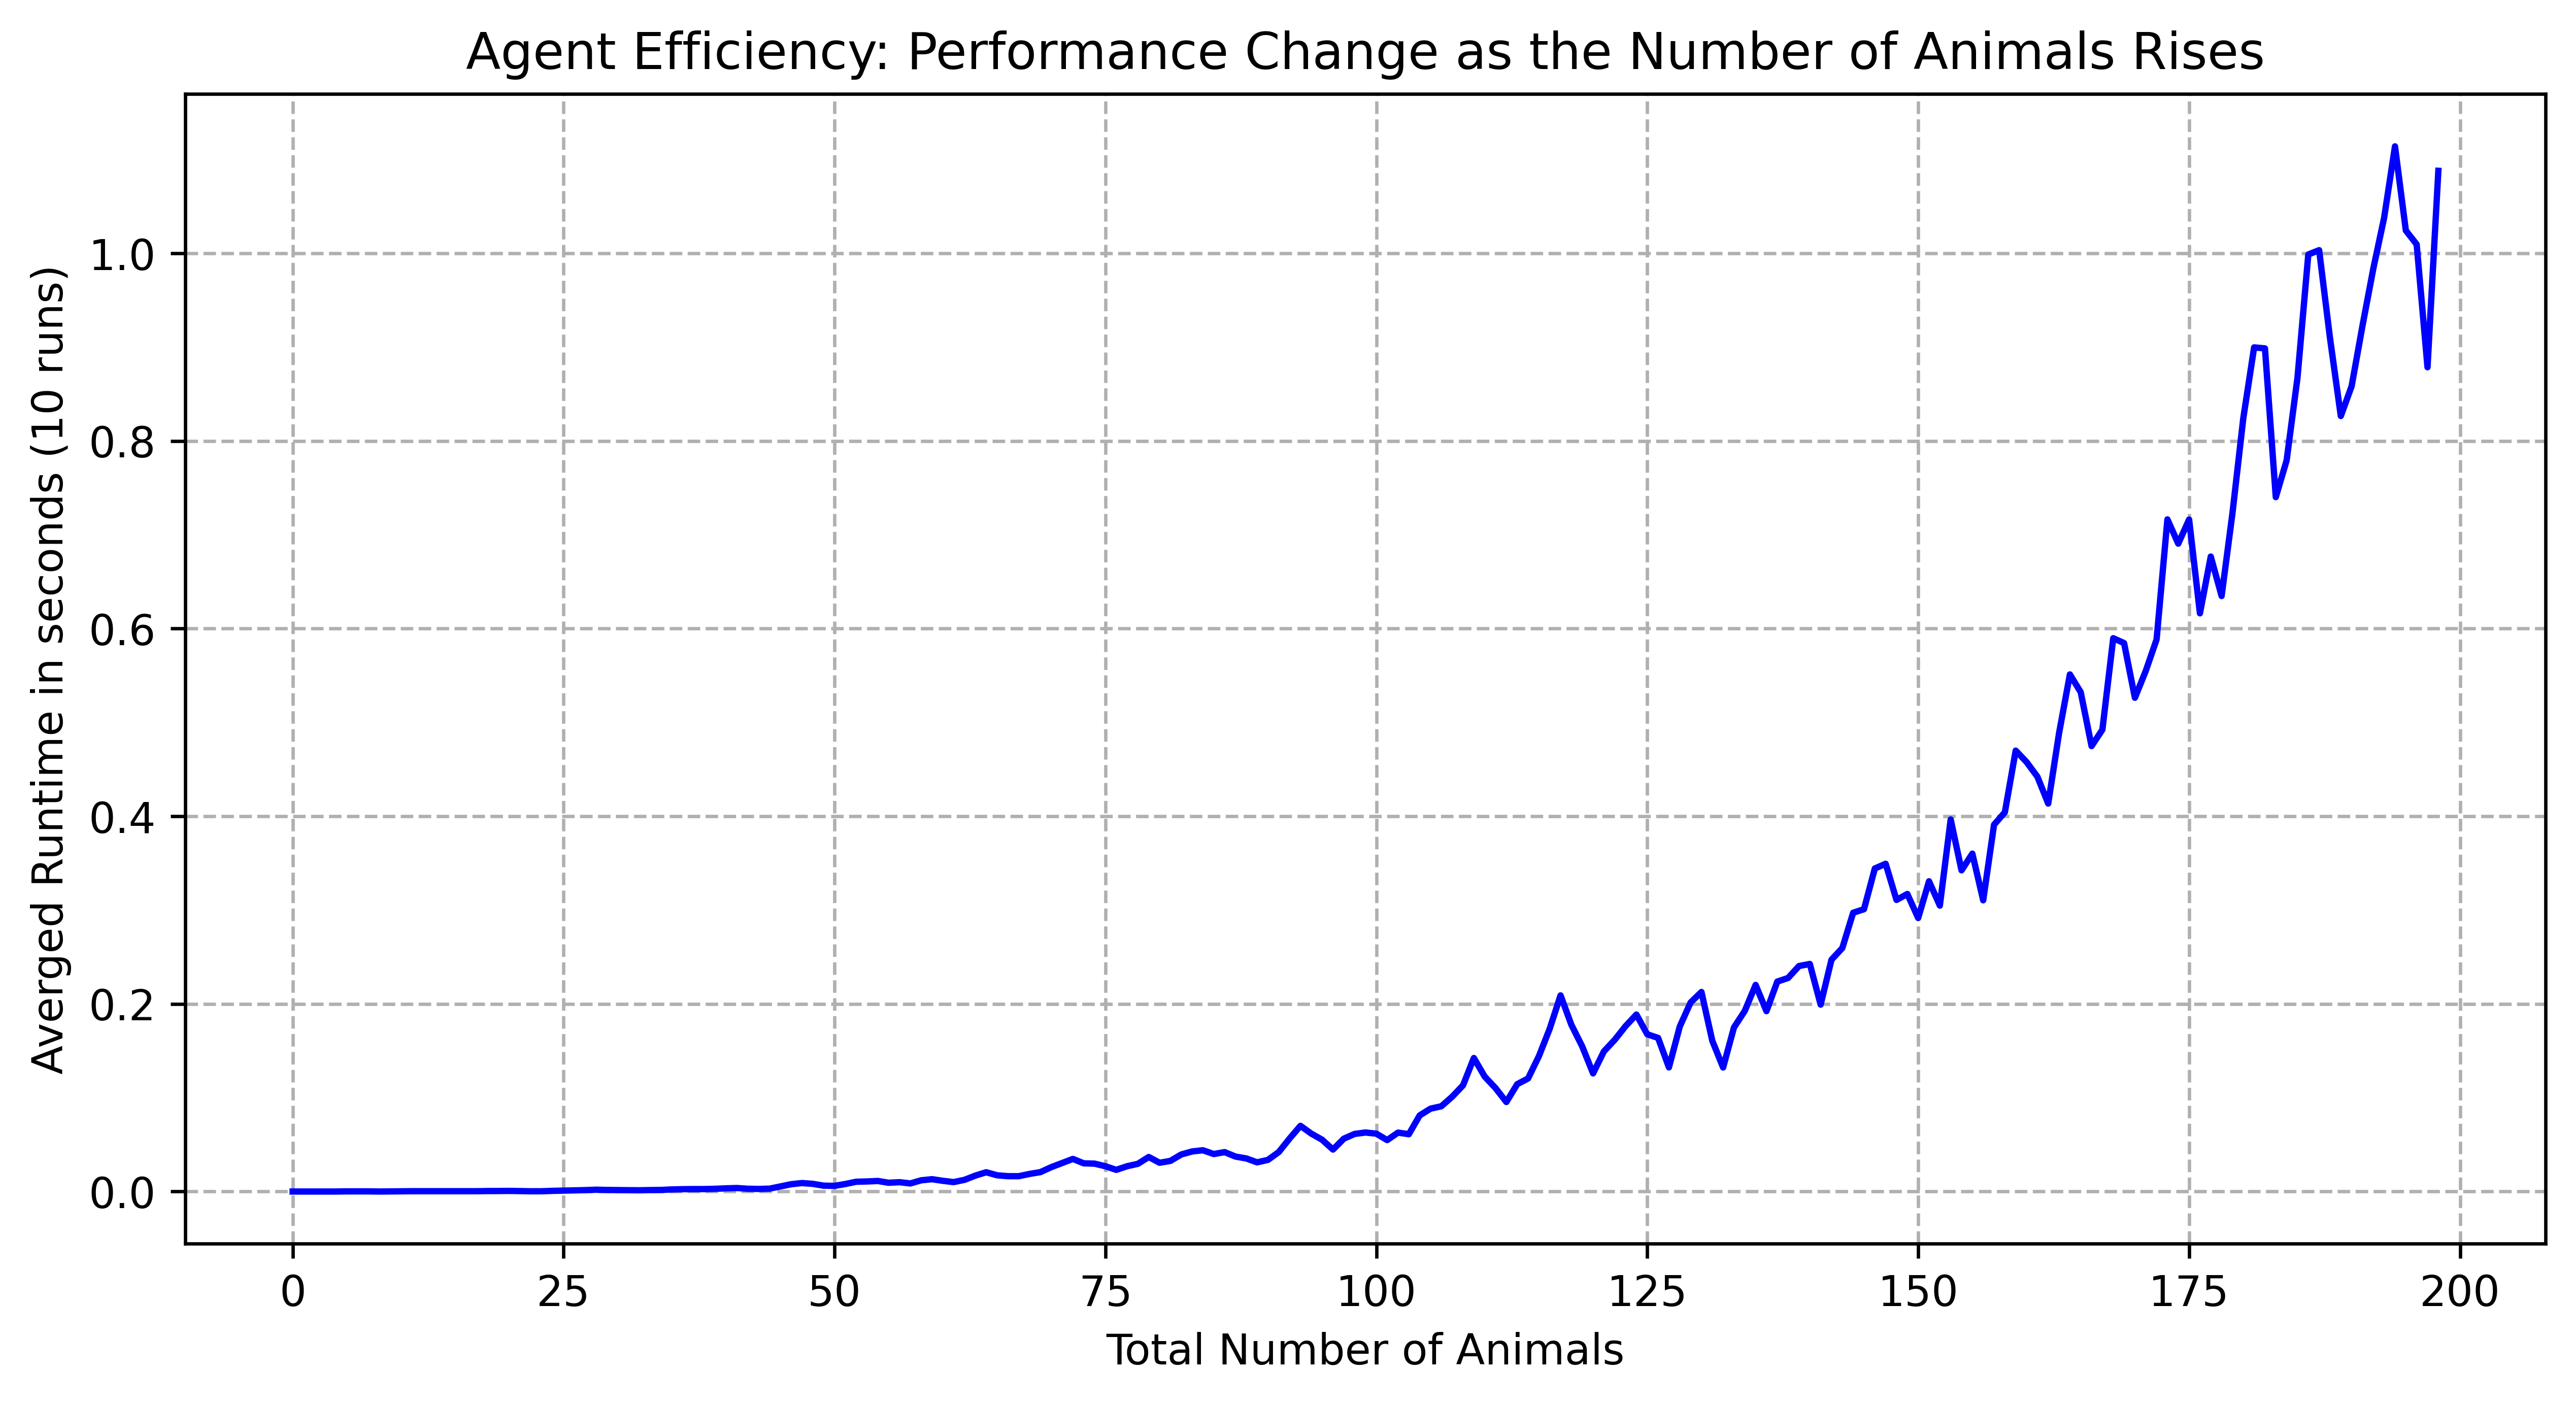

In [142]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from matplotlib.dates import DayLocator

# create date and prices
total_number = df_compare['total']
runtime = df_compare['runtime']

# add lines and labels
plt.plot(total_number, runtime, color='blue')

# add titles
plt.title("Agent Efficiency: Performance Change as the Number of Animals Rises")
plt.xlabel("Total Number of Animals")
plt.ylabel("Averged Runtime in seconds (10 runs)")
plt.grid(linestyle='--')

# Set the x and y format
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# set figure size
plt.rcParams['figure.dpi'] = 600
plt.gcf().set_size_inches(10, 5)

In [126]:
def moving_average(data, window_size):
    return [sum(data[i:i+window_size])/window_size for i in range(len(data) - window_size + 1)]


In [132]:
window_size = 3
smoothed_data = moving_average(runtime_list, window_size)